In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import CountVectorizer
import itertools
from collections import Counter

In [7]:
def generate_kmers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

def create_kmer_df(df, k):
    # Generate all possible k-mers
    nucleotides = ['A', 'C', 'G', 'T']
    kmer_list = [''.join(p) for p in itertools.product(nucleotides, repeat=k)]
    
    # Generate k-mer counts for each sequence
    df_kmers = df['sequence'].apply(lambda x: pd.Series(Counter(generate_kmers(x, k))))
    
    # Replace NaNs with zeros and reorder columns
    df_kmers = df_kmers.fillna(0).reindex(columns=kmer_list, fill_value=0)

    return df_kmers



In [8]:
c9_test = np.load('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/V2/C9ALS_test_seqs.npy', allow_pickle=True)
# select the second and third column and convert to dataframe with column names ID and sequence
c9_test = pd.DataFrame(c9_test[:,1:3], columns=['ID', 'sequence'])
c9_test.head()

,ID,sequence
0,chr2:AAK1:69465314:69467864:-,CUCGGCCUCUCCUUAUGGAGUCUGAAGAAGAAGAUGAGAGCUGCAG...
1,chr2:AAK1:69467864:69472042:-,AAAAACCCACUUUUUAACAAAUAAUUUUGAUGGGUUAGACAUGUUC...
2,chr16:AARS:70252298:70252417:-,CAAGAUCACGUGCCUGUGUCAAGUUCCCCAGGUCAGCACCACCUCG...
3,chr17:ABCA10:69147178:69235076:-,UUUCUGUAUCUUUUCACCUCACAGUUCAUGAACAUUUCCCAUGUCA...
4,chr17:ABCA5:69245731:69247124:-,CUUGGAACAUAUAAAUUUUUUGUCAUCUUCCUUGCAAAGGGCACAU...


In [9]:
# Example usage:
k = 4  # Change this to generate k-mers of different length
test_kmer_df = create_kmer_df(c9_test, k)
test_kmer_df

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,35.0,24.0,18.0,0,17.0,13.0,2.0,0,28.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,44.0,29.0,22.0,0,22.0,12.0,5.0,0,26.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,6.0,12.0,0,10.0,12.0,10.0,0,23.0,8.0,...,0,0,0,0,0,0,0,0,0,0
3,73.0,22.0,30.0,0,20.0,14.0,2.0,0,30.0,15.0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,19.0,38.0,0,27.0,13.0,4.0,0,23.0,15.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18268,21.0,19.0,15.0,0,21.0,12.0,4.0,0,13.0,10.0,...,0,0,0,0,0,0,0,0,0,0
18269,45.0,9.0,25.0,0,13.0,9.0,4.0,0,14.0,8.0,...,0,0,0,0,0,0,0,0,0,0
18270,53.0,23.0,28.0,0,27.0,8.0,2.0,0,15.0,9.0,...,0,0,0,0,0,0,0,0,0,0
18271,67.0,32.0,46.0,0,22.0,14.0,1.0,0,58.0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
c9_train = np.load('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/V2/C9ALS_train_seqs.npy', allow_pickle=True)
# select the second and third column and convert to dataframe with column names ID and sequence
c9_train = pd.DataFrame(c9_train[:,1:3], columns=['ID', 'sequence'])
train_kmer_df = create_kmer_df(c9_train, k)
train_kmer_df

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,54.0,8.0,18.0,0,16.0,8.0,4.0,0,13.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,26.0,35.0,0,32.0,17.0,0.0,0,26.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,18.0,25.0,0,27.0,8.0,2.0,0,21.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,11.0,26.0,0,17.0,7.0,0.0,0,26.0,14.0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,15.0,26.0,0,20.0,11.0,0.0,0,35.0,23.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148015,66.0,25.0,19.0,0,24.0,15.0,1.0,0,20.0,5.0,...,0,0,0,0,0,0,0,0,0,0
148016,63.0,22.0,23.0,0,20.0,13.0,0.0,0,22.0,7.0,...,0,0,0,0,0,0,0,0,0,0
148017,59.0,16.0,23.0,0,22.0,14.0,1.0,0,21.0,8.0,...,0,0,0,0,0,0,0,0,0,0
148018,28.0,7.0,14.0,0,7.0,6.0,2.0,0,14.0,8.0,...,0,0,0,0,0,0,0,0,0,0


OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/home/aiden/anaconda3/envs/for_DL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


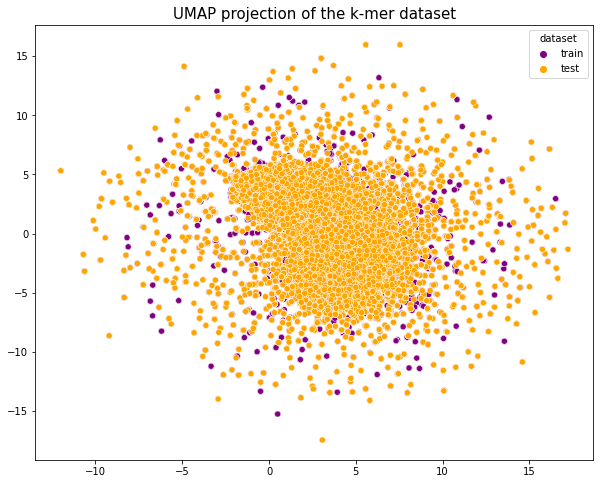

In [11]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Add labels to the train and test datasets
train_kmer_df['dataset'] = 'train'
test_kmer_df['dataset'] = 'test'

# Combine the datasets
combined_kmer_df = pd.concat([train_kmer_df, test_kmer_df])

# Separate out the data and labels
data = combined_kmer_df.drop('dataset', axis=1)
labels = combined_kmer_df['dataset']

# Standardize the data
data = StandardScaler().fit_transform(data)

# Perform UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data)

# Create a UMAP plot
plt.figure(figsize=(10, 8))
colors = ['purple', 'orange']
sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=labels, palette=colors)
# sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=labels, palette='viridis')
plt.title('UMAP projection of the k-mer dataset', fontsize=15)
plt.show()


/home/aiden/anaconda3/envs/for_DL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


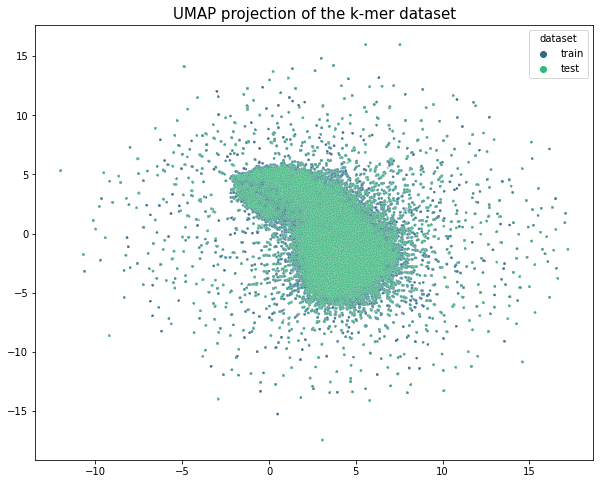

<Figure size 720x576 with 0 Axes>

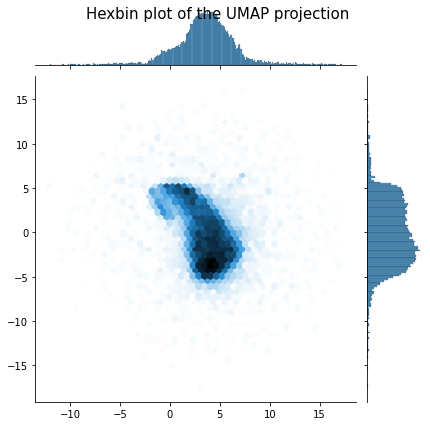

In [28]:
# Create a UMAP plot with adjusted transparency and smaller marker size
plt.figure(figsize=(10, 8))
sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=labels, palette='viridis', alpha=0.5, s=5)
plt.title('UMAP projection of the k-mer dataset', fontsize=15)
plt.show()


# Create a hexbin plot
plt.figure(figsize=(10, 8))
sns.jointplot(x=embedding[:, 0], y=embedding[:, 1], kind="hex")
plt.suptitle('Hexbin plot of the UMAP projection', fontsize=15, y=0.98)
plt.show()


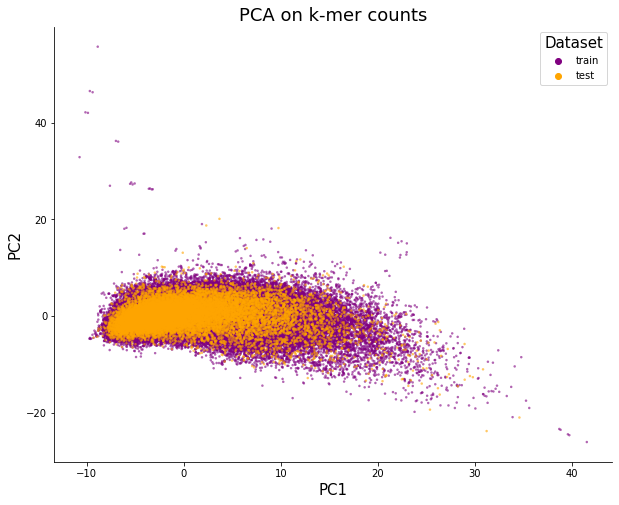

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# Convert to a DataFrame
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# Concatenate with target label
finalDf = pd.concat([principalDf, labels.reset_index(drop=True)], axis = 1)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatterplot
colors = ['purple', 'orange']
sns.scatterplot(x="PC1", y="PC2", hue="dataset", data=finalDf, palette=colors, alpha=0.6, s=5, edgecolor=None)

# Set title and labels
plt.title('PCA on k-mer counts', fontsize=18)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)

# Remove grid
ax.grid(False)

# Despine plot
sns.despine()

# Improve legend
leg = ax.legend()
leg.set_title("Dataset",prop={'size':15})

# Save the figure
plt.savefig("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/V2/PCA_plot.pdf", dpi=300, bbox_inches='tight')


In [32]:
from scipy import stats

# Create an empty DataFrame to store the results
ks_results = pd.DataFrame(columns=['kmer', 'statistic', 'pvalue'])

# Perform a two-sample KS test for each k-mer
for kmer in train_kmer_df.columns:
    statistic, pvalue = stats.ks_2samp(train_kmer_df[kmer], test_kmer_df[kmer])
    ks_results = ks_results.append({'kmer': kmer, 'statistic': statistic, 'pvalue': pvalue}, ignore_index=True)

# Display the results
print(ks_results)


        kmer  statistic    pvalue
0       AAAA   0.004567  0.885097
1       AAAC   0.005657  0.673127
2       AAAG   0.002231  0.999998
3       AAAT   0.000000  1.000000
4       AACA   0.004978  0.813031
..       ...        ...       ...
252     TTTA   0.000000  1.000000
253     TTTC   0.000000  1.000000
254     TTTG   0.000000  1.000000
255     TTTT   0.000000  1.000000
256  dataset   1.000000  0.000000

[257 rows x 3 columns]


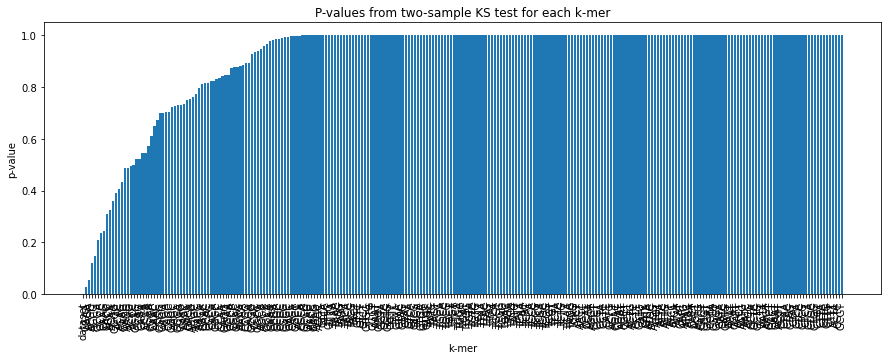

In [33]:
# Sort the results by p-value
ks_results_sorted = ks_results.sort_values('pvalue')

# Create a bar plot of the p-values
plt.figure(figsize=(15, 5))
plt.bar(ks_results_sorted['kmer'], ks_results_sorted['pvalue'])
plt.xlabel('k-mer')
plt.ylabel('p-value')
plt.title('P-values from two-sample KS test for each k-mer')
plt.xticks(rotation=90)
plt.show()
